## VGG16 implementation

# Import and become one with the data

In [ ]:
import tensorflow as tf
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path = "/content/drive/MyDrive/Project dataset/chest X ray subsets.zip"

In [ ]:
import zipfile

# Unzip the file
zip_ref = zipfile.ZipFile(dataset_path)
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os

# Walk through 2 classes of food image data
for dirpath, dirnames, filenames in os.walk("chest X ray subsets"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 3 directories and 0 images in chest X ray subsets
There are 2 directories and 0 images in chest X ray subsets/Dataset 1
There are 0 directories and 403 images in chest X ray subsets/Dataset 1/Covid-19
There are 0 directories and 721 images in chest X ray subsets/Dataset 1/Healthy
There are 2 directories and 0 images in chest X ray subsets/Dataset 2
There are 0 directories and 3616 images in chest X ray subsets/Dataset 2/Covid-19
There are 0 directories and 10192 images in chest X ray subsets/Dataset 2/Healthy
There are 3 directories and 0 images in chest X ray subsets/Dataset 3
There are 0 directories and 3616 images in chest X ray subsets/Dataset 3/Covid-19
There are 0 directories and 1345 images in chest X ray subsets/Dataset 3/Viral Pneumonia
There are 0 directories and 10192 images in chest X ray subsets/Dataset 3/Healthy


In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
def split_folders():
  splitfolders.ratio(input=input_folder, output=output_folder,
    seed=1337, ratio=(.8, .2), group_prefix=None, move=False) # default values

In [ ]:
# Dataset 1

input_folder = "/content/chest X ray subsets/Dataset 1"
os.mkdir("/content/chest X ray subsets/Dataset 1_split")
output_folder = "/content/chest X ray subsets/Dataset 1_split"

split_folders()

Copying files: 1124 files [00:00, 6976.90 files/s]


In [ ]:
# Dataset 2

input_folder = "/content/chest X ray subsets/Dataset 2"
os.mkdir("/content/chest X ray subsets/Dataset 2_split")
output_folder = "/content/chest X ray subsets/Dataset 2_split"

split_folders()

Copying files: 13808 files [00:14, 937.88 files/s] 


In [ ]:
# Dataset 3

input_folder = "/content/chest X ray subsets/Dataset 3"
os.mkdir("/content/chest X ray subsets/Dataset 3_split")
output_folder = "/content/chest X ray subsets/Dataset 3_split"

split_folders()

Copying files: 15153 files [00:02, 5370.98 files/s]


In [ ]:
# Setup the train and test directories for dataset 1
train_dir_dataset_1 = "/content/chest X ray subsets/Dataset 1_split/train/"
test_dir_dataset_1 = "/content/chest X ray subsets/Dataset 1_split/val/"

In [ ]:
# Setup the train and test directories for dataset 2
train_dir_dataset_2 = "/content/chest X ray subsets/Dataset 2_split/train/"
test_dir_dataset_2 = "/content/chest X ray subsets/Dataset 2_split/val/"

In [20]:
# Setup the train and test directories for dataset 3
train_dir_dataset_3 = "/content/chest X ray subsets/Dataset 3_split/train/"
test_dir_dataset_3 = "/content/chest X ray subsets/Dataset 3_split/val/"

In [ ]:
# Let's get the class names
import pathlib
import numpy as np
dir_path = pathlib.Path(train_dir_dataset_3)
class_names = np.array(sorted([item.name for item in dir_path.glob('*')]))
class_names

array(['Covid-19', 'Healthy', 'Viral Pneumonia'], dtype='<U15')

## Preparation of data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# From ImageDataGenerator, we are preprocessing and augmenting our data
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

### Loading the images into data loaders

In [ ]:
# Dataset 1

train_dir = train_dir_dataset_1
test_dir = test_dir_dataset_1

In [ ]:
# Dataset 2

train_dir = train_dir_dataset_2
test_dir = test_dir_dataset_2

In [ ]:
# Dataset 3

train_dir = train_dir_dataset_3
test_dir = test_dir_dataset_3

In [ ]:
# Setup data inputs

img_width = 224
img_height = 224
batch_size = 32

print("Training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(img_width, img_height),
                                               batch_size=batch_size,
                                               #class_mode="binary",
                                               class_mode="categorical",
                                               color_mode='grayscale',
                                               shuffle=True)  # shuffling between normal and covid

print("Testing images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(img_width, img_height),
                                             batch_size=batch_size,
                                             #class_mode="binary",
                                             class_mode="categorical",
                                             color_mode='grayscale',
                                             shuffle=False)   # No need to shuffle data

Training images:
Found 12121 images belonging to 3 classes.
Testing images:
Found 3032 images belonging to 3 classes.


## Create a model (start with a baseline)

In [ ]:
# import tensorflow_hub as hub from tensorflow.keras import layers
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
# Architecture of VGG16:
model= Sequential()
model.add(Conv2D(input_shape=(224,224,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=3, activation="softmax"))   # units and activation change accordingly

In [ ]:
# Model's Compilation for binary

model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

In [ ]:
# Model's Compilation for categorical

model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

### Fit a model

In [ ]:
# Model's training
epochs = 10

In [ ]:
# Dataset 1

# Fit the model

import time
start = time.time()
history_1 = model.fit(train_data,
                      epochs=epochs,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

end = time.time()
print("Total training time for ", epochs, " epochs: " , round(end - start), "seconds/", round((end - start)/60) , " minutes")

Epoch 1/10
29/29 [==============================] - 33s 508ms/step - loss: 0.6800 - accuracy: 0.6370 - val_loss: 0.6247 - val_accuracy: 0.6416
Epoch 2/10
29/29 [==============================] - 13s 444ms/step - loss: 0.3753 - accuracy: 0.8330 - val_loss: 0.2621 - val_accuracy: 0.8894
Epoch 3/10
29/29 [==============================] - 13s 447ms/step - loss: 0.2513 - accuracy: 0.9176 - val_loss: 0.2549 - val_accuracy: 0.8850
Epoch 4/10
29/29 [==============================] - 13s 450ms/step - loss: 0.2244 - accuracy: 0.9143 - val_loss: 0.1976 - val_accuracy: 0.9336
Epoch 5/10
29/29 [==============================] - 13s 454ms/step - loss: 0.2523 - accuracy: 0.8920 - val_loss: 0.3834 - val_accuracy: 0.8230
Epoch 6/10
29/29 [==============================] - 13s 467ms/step - loss: 0.2807 - accuracy: 0.9098 - val_loss: 0.2241 - val_accuracy: 0.9204
Epoch 7/10
29/29 [==============================] - 13s 458ms/step - loss: 0.2092 - accuracy: 0.9332 - val_loss: 0.2225 - val_accuracy: 0.9204

In [ ]:
# Dataset 2

# Fit the model

import time
start = time.time()

history_2 = model.fit(train_data,
                      epochs=epochs,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

end = time.time()
print("Total training time for ", epochs, " epochs: " , round(end - start), "seconds/", round((end - start)/60) , " minutes")

Epoch 1/10
346/346 [==============================] - 170s 489ms/step - loss: 0.3612 - accuracy: 0.8438 - val_loss: 0.2224 - val_accuracy: 0.9131
Epoch 2/10
346/346 [==============================] - 172s 496ms/step - loss: 0.1798 - accuracy: 0.9311 - val_loss: 0.1540 - val_accuracy: 0.9446
Epoch 3/10
346/346 [==============================] - 171s 495ms/step - loss: 0.1320 - accuracy: 0.9504 - val_loss: 0.1508 - val_accuracy: 0.9453
Epoch 4/10
346/346 [==============================] - 171s 494ms/step - loss: 0.0995 - accuracy: 0.9612 - val_loss: 0.1590 - val_accuracy: 0.9301
Epoch 5/10
346/346 [==============================] - 170s 492ms/step - loss: 0.0787 - accuracy: 0.9721 - val_loss: 0.1139 - val_accuracy: 0.9595
Epoch 6/10
346/346 [==============================] - 169s 490ms/step - loss: 0.0587 - accuracy: 0.9793 - val_loss: 0.0861 - val_accuracy: 0.9707
Epoch 7/10
346/346 [==============================] - 169s 489ms/step - loss: 0.0403 - accuracy: 0.9846 - val_loss: 0.0916 -

In [19]:
# Dataset 3

# Fit the model

import time
start = time.time()

history_3 = model.fit(train_data,
                      epochs=epochs,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

end = time.time()
print("Total training time for ", epochs, " epochs: " , round(end - start), "seconds/", round((end - start)/60) , " minutes")

Epoch 1/10
379/379 [==============================] - 208s 495ms/step - loss: 0.5501 - accuracy: 0.7669 - val_loss: 0.3564 - val_accuracy: 0.8509
Epoch 2/10
379/379 [==============================] - 183s 482ms/step - loss: 0.2446 - accuracy: 0.9063 - val_loss: 0.2678 - val_accuracy: 0.8948
Epoch 3/10
379/379 [==============================] - 182s 480ms/step - loss: 0.1709 - accuracy: 0.9386 - val_loss: 0.1533 - val_accuracy: 0.9459
Epoch 4/10
379/379 [==============================] - 182s 480ms/step - loss: 0.1297 - accuracy: 0.9536 - val_loss: 0.1207 - val_accuracy: 0.9545
Epoch 5/10
379/379 [==============================] - 182s 479ms/step - loss: 0.1026 - accuracy: 0.9632 - val_loss: 0.1169 - val_accuracy: 0.9565
Epoch 6/10
379/379 [==============================] - 182s 480ms/step - loss: 0.0827 - accuracy: 0.9702 - val_loss: 0.1279 - val_accuracy: 0.9584
Epoch 7/10
379/379 [==============================] - 182s 479ms/step - loss: 0.0713 - accuracy: 0.9762 - val_loss: 0.1094 -

## Saving the models (say for later use)

In [22]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.

# change accordingly
#model.save('/content/VGG16_model_1.h5')
#model.save('/content/VGG16_model_2.h5')
model.save('/content/VGG16_model_3.h5')

## Evaulate the model

In [ ]:
# Dataset 1

# Evaluate on test data
model.evaluate(test_data)

8/8 [==============================] - 1s 131ms/step - loss: 0.1815 - accuracy: 0.9425


[0.18147820234298706, 0.9424778819084167]

In [ ]:
# Dataset 2

# Evaluate on test data
model.evaluate(test_data)

87/87 [==============================] - 14s 154ms/step - loss: 0.1189 - accuracy: 0.9660


[0.11885937303304672, 0.9659789800643921]

In [21]:
# Dataset 3

# Evaluate on test data
model.evaluate(test_data)

95/95 [==============================] - 17s 182ms/step - loss: 0.1272 - accuracy: 0.9627


[0.12724284827709198, 0.962730884552002]

### Confusion matrix

In [ ]:
# Lets make function for y_preds
def model_pred(model):
  pred_probs = tf.round(model.predict(test_data))
  y_preds = tf.reshape(pred_probs, [-1])
  y_preds = np.array(y_preds).astype(int)
  return y_preds

In [ ]:
y_preds = model_pred(model = model)

In [ ]:
import math
n=32
number_of_examples = len(test_data.filenames)
number_of_generator_calls = math.ceil(number_of_examples / (1.0 * n)) 
# 1.0 above is to skip integer division

test_labels = []

for i in range(0,int(number_of_generator_calls)):
    test_labels.extend(np.array(test_data[i][1]))
  

test_labels = np.array(test_labels).astype(int)
test_labels[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, y_preds)

array([[ 703,   21],
       [  73, 1966]])

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

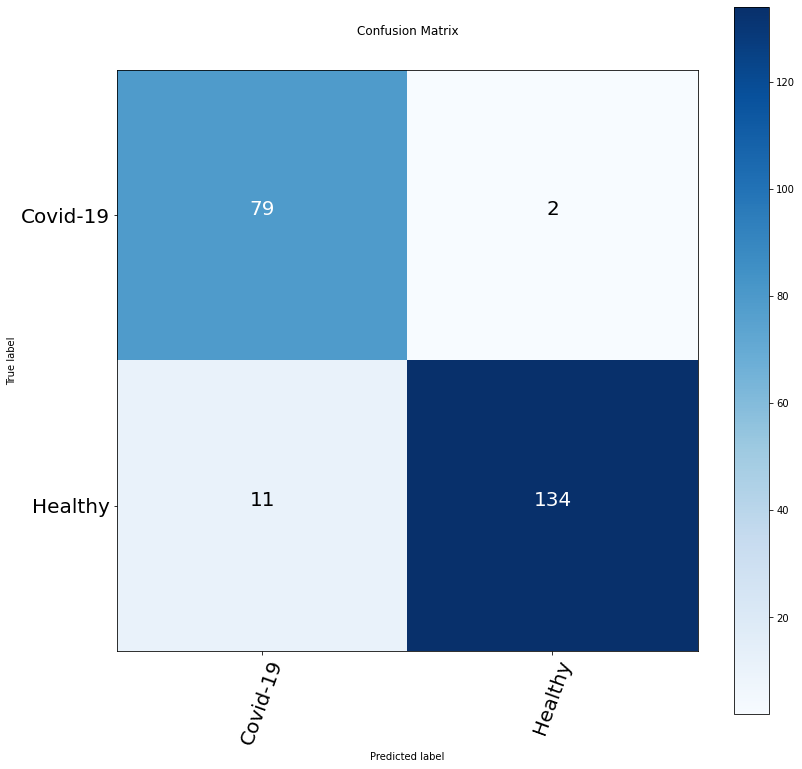

In [ ]:
# Plot a confusion matrix for dataset 1

make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=['Covid-19', 'Healthy'],
                      figsize=(13, 13),
                      text_size=20,
                      norm=False,
                      savefig=True)

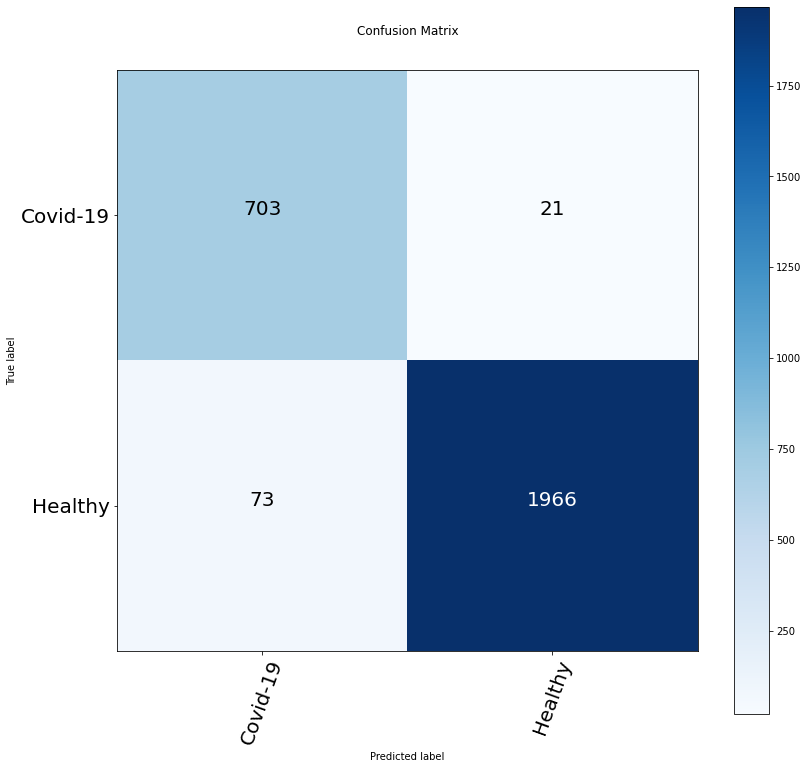

In [ ]:
# Plot a confusion matrix for dataset 2

make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=['Covid-19', 'Healthy'],
                      figsize=(13, 13),
                      text_size=20,
                      norm=False,
                      savefig=True)

In [ ]:
# If you wanted to, you could really turn this into a helper function to load in with a helper.py script...
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.figure(figsize=(17, 7))
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

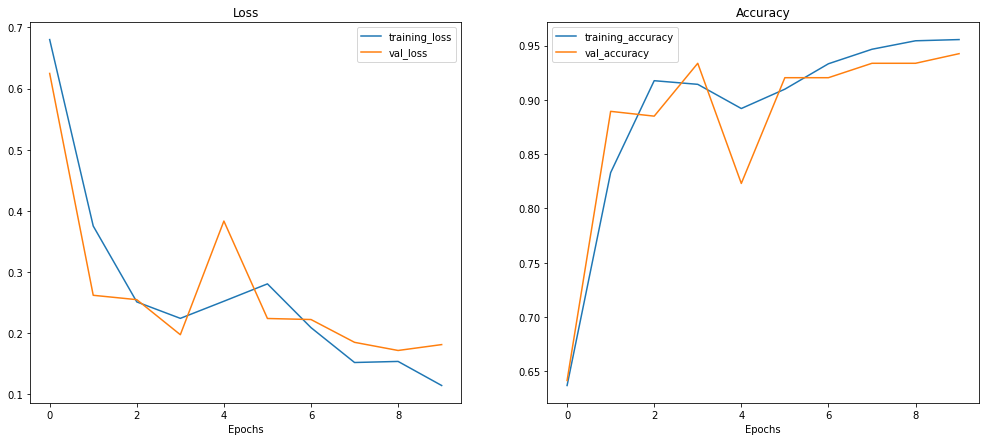

In [ ]:
# Visualization:
plot_loss_curves(history=history_1)

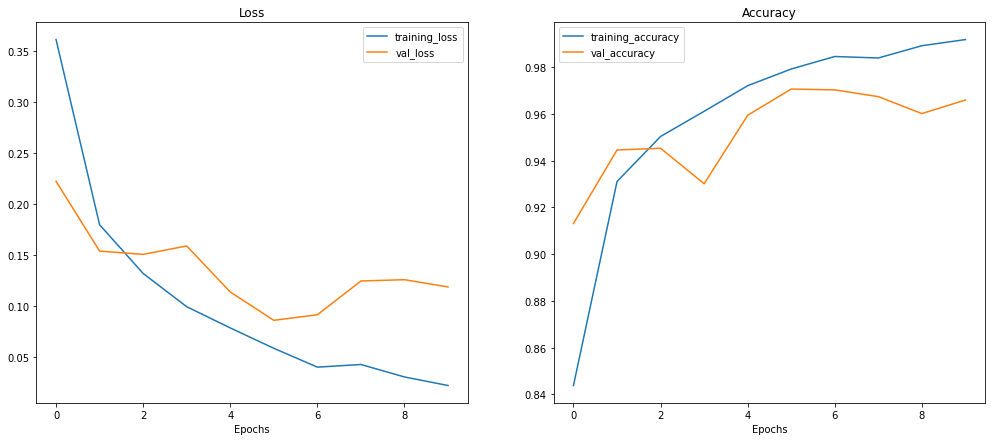

In [ ]:
# Visualization:
plot_loss_curves(history=history_2)

In [ ]:
# Visualization:
plot_loss_curves(history=history_3)

In [ ]:
# for dataset 1

from sklearn.metrics import classification_report
print(classification_report(test_labels, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92        81
           1       0.99      0.92      0.95       145

    accuracy                           0.94       226
   macro avg       0.93      0.95      0.94       226
weighted avg       0.95      0.94      0.94       226



In [ ]:
# for dataset 2

from sklearn.metrics import classification_report
print(classification_report(test_labels, y_preds))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       724
           1       0.99      0.96      0.98      2039

    accuracy                           0.97      2763
   macro avg       0.95      0.97      0.96      2763
weighted avg       0.97      0.97      0.97      2763

